In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [33]:
#Load the dataset
data = pd.read_csv("scores_full.csv")
data2 = pd.read_csv("5_days_sleep_pattern_1.csv")
data = data.drop(["Unnamed: 0", "days", "inpatient"], 1)
data2 = data2.drop(["Id", "Unnamed: 0"], 1)
df_loan = data.join(data2)
df

C:\Users\ksd04\AppData\Local\Temp\ipykernel_31496\2864102887.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(["Unnamed: 0", "days", "inpatient"], 1)
C:\Users\ksd04\AppData\Local\Temp\ipykernel_31496\2864102887.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop(["Id", "Unnamed: 0"], 1)


,Id,gender,age,afftype,melanch,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity
0,0,2,37,2,2,8,1,2,19,10693.6,228824.0
1,0,2,42,1,2,8,2,2,24,48771.2,239278.2
2,0,1,47,2,2,8,2,2,24,43211.0,317726.0
3,0,2,27,2,2,13,1,1,20,56892.4,194298.2
4,0,2,52,2,2,13,2,2,26,31303.8,200302.2
5,0,1,37,2,2,8,1,2,18,26634.2,240767.8
6,0,1,22,1,2,13,2,1,24,61643.6,335598.2
7,0,2,27,2,2,13,1,2,20,34374.2,284320.6
8,0,2,47,1,2,8,1,2,26,42992.0,203120.0
9,0,2,47,2,2,8,1,2,28,25811.0,482765.0


In [34]:
df_loan.head()

,Id,gender,age,afftype,melanch,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity
0,0,2,37,2,2,8,1,2,19,10693.6,228824.0
1,0,2,42,1,2,8,2,2,24,48771.2,239278.2
2,0,1,47,2,2,8,2,2,24,43211.0,317726.0
3,0,2,27,2,2,13,1,1,20,56892.4,194298.2
4,0,2,52,2,2,13,2,2,26,31303.8,200302.2


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [36]:
X = df_loan.drop("Id", 1)
y = df_loan["Id"]

C:\Users\ksd04\AppData\Local\Temp\ipykernel_31496\3463090574.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_loan.drop("Id", 1)


In [37]:
X.shape,y.shape

((55, 10), (55,))

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.30)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 10)
(17, 10)
(38,)
(17,)


In [40]:
# Without feature selection check auuracy with Random forest
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf_w)

1.0

<AxesSubplot:xlabel='Features', ylabel='Importances'>

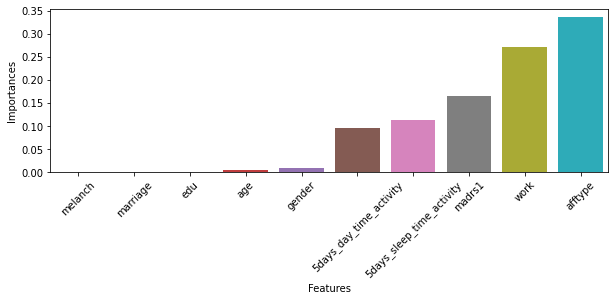

In [41]:
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [42]:
# With feature selection check auuracy with Random Forest
# The following example shows how to retrieve the 7 most informative features
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=7, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)
#Reduce X to the selected features and then predict using the predict
y_pred_rf = sel_rfe_tree.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf)

[False  True  True False  True False  True  True  True  True]
[2 1 1 4 1 3 1 1 1 1]


1.0